<a href="https://colab.research.google.com/github/TriYogaF/dataset/blob/main/spectral_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import SpectralClustering
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Baca dataset ulasan game dari file CSV
url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'

data = pd.read_csv(url)  # Gantilah 'nama_file.csv' dengan nama file dataset Anda

# Hapus baris yang memiliki nilai null atau kosong jika ada
data.dropna(subset=['review'], inplace=True)

# Pra-pemrosesan teks
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [stemmer.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)

# Ekstraksi fitur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review'])

# Spectral Clustering
n_clusters = 5  # Ganti dengan jumlah cluster yang diinginkan
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
cluster_labels = spectral_clustering.fit_predict(tfidf_matrix)

# Tambahkan kolom hasil clustering ke dataframe
data['cluster'] = cluster_labels

# Menampilkan hasil clustering
clusters = {}
for cluster_id in range(n_clusters):
    cluster_words = ' '.join(data[data['cluster'] == cluster_id]['review'])
    clusters[f'Cluster {cluster_id + 1}'] = cluster_words

for cluster_id, cluster_words in clusters.items():
    print(f'Cluster {cluster_id}:\n{cluster_words}\n')

# Simpan hasil clustering ke file CSV jika diperlukan
data.to_csv('hasil_clustering.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Cluster Cluster 1:
kill fun write review complet elden ring yet despit still find new thing everi time play game elden ring experi say least wo dramat say life chang feel like video game play ever go play game immers full stori everi littl thing made refin detail easili miss littl thing everyth feel interconnect easi get lost find adventur long time sinc felt like game realli want go explor fun world feel punish punish game goe unreward breakdown game tri spoil post spoiler warn case stori fromsoft game world vagu extrem open end huge mess done wrong done entir right stori hand silver platter howev wish go find charact storylin given plenti exposit develop charact made make care hate lot elden ring shine charact weav stori import boss feel kill due stori context context given bit bit realli sell journey end done golden mask dungeat end realli interest much note spoiler ahead skip section want end actual one satisfi end soul game seen long time compel charact roster companion feel fun d

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# Baca dataset ulasan game dari file CSV
url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'

data = pd.read_csv(url)  # Gantilah 'nama_file.csv' dengan nama file dataset Anda

# Hapus baris yang memiliki nilai null atau kosong jika ada
data.dropna(subset=['review'], inplace=True)

# Pra-pemrosesan teks
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [stemmer.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)

# Matriks Adjacency (A)
reviews = data['review'].tolist()
n = len(reviews)
adjacency_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            review1 = set(reviews[i].split())
            review2 = set(reviews[j].split())
            common_words = len(review1.intersection(review2))
            adjacency_matrix[i][j] = common_words

# Matriks Degree (D)
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))

# Matriks Laplacian (L)
laplacian_matrix = degree_matrix - adjacency_matrix

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Pilih k eigenvalue terkecil dan eigenvector yang sesuai
k = 3  # Ganti dengan jumlah cluster yang diinginkan
eigenvalue_indices = np.argsort(eigenvalues)[:k]
eigenvectors_k = eigenvectors[:, eigenvalue_indices]

# K-means clustering pada eigenvectors
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(eigenvectors_k)

# Tambahkan kolom hasil clustering ke dataframe
data['cluster'] = cluster_labels

# Menampilkan hasil clustering
clusters = {}
for cluster_id in range(k):
    cluster_words = ' '.join(data[data['cluster'] == cluster_id]['review'])
    clusters[f'Cluster {cluster_id + 1}'] = cluster_words

for cluster_id, cluster_words in clusters.items():
    print(f'Cluster {cluster_id}:\n{cluster_words}\n')

# Simpan hasil clustering ke file CSV jika diperlukan
data.to_csv('hasil_clustering.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Cluster 1:
kill fun write review complet elden ring yet despit still find new thing everi time play game elden ring experi say least wo dramat say life chang feel like video game play ever go play game immers full stori everi littl thing made refin detail easili miss littl thing everyth feel interconnect easi get lost find adventur long time sinc felt like game realli want go explor fun world feel punish punish game goe unreward breakdown game tri spoil post spoiler warn case stori fromsoft game world vagu extrem open end huge mess done wrong done entir right stori hand silver platter howev wish go find charact storylin given plenti exposit develop charact made make care hate lot elden ring shine charact weav stori import boss feel kill due stori context context given bit bit realli sell journey end done golden mask dungeat end realli interest much note spoiler ahead skip section want end actual one satisfi end soul game seen long time compel charact roster companion feel fun d

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'
# Baca dataset ulasan game dari file CSV
data = pd.read_csv(url)  # Gantilah 'nama_file.csv' dengan nama file dataset Anda

# Hapus baris yang memiliki nilai null atau kosong jika ada
data.dropna(subset=['review'], inplace=True)

# Pra-pemrosesan Teks
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [stemmer.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)

# Ekstraksi fitur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review'])

# Reduksi dimensi dengan PCA
pca = PCA(n_components=50)  # Ubah jumlah komponen sesuai kebutuhan
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix)

# Matriks Adjacency (A)
reviews = data['review'].tolist()
n = len(reviews)
adjacency_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            review1 = set(reviews[i].split())
            review2 = set(reviews[j].split())
            common_words = len(review1.intersection(review2))
            adjacency_matrix[i][j] = common_words

# Matriks Degree (D)
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))

# Matriks Laplacian (L)
laplacian_matrix = degree_matrix - adjacency_matrix

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Pilih k eigenvalue terkecil dan eigenvector yang sesuai
k = 3  # Ganti dengan jumlah cluster yang diinginkan
eigenvalue_indices = np.argsort(eigenvalues)[:k]
eigenvectors_k = eigenvectors[:, eigenvalue_indices]

# K-means clustering pada eigenvectors
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(eigenvectors_k)

# Tambahkan kolom hasil clustering ke dataframe
data['cluster'] = cluster_labels

# Menampilkan hasil clustering
clusters = {}
for cluster_id in range(k):
    cluster_words = ' '.join(data[data['cluster'] == cluster_id]['review'])
    clusters[f'Cluster {cluster_id + 1}'] = cluster_words

for cluster_id, cluster_words in clusters.items():
    print(f'Cluster {cluster_id}:\n{cluster_words}\n')

# Simpan hasil clustering ke file CSV jika diperlukan
data.to_csv('hasil_clustering.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances


url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'
# Baca dataset ulasan game dari file CSV
df = pd.read_csv(url)  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Hapus baris yang memiliki nilai null atau kosong jika ada
df.dropna(subset=['review'], inplace=True)

# Ekstraksi fitur teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Reduksi dimensi dengan menggunakan PCA
n_components = 2  # Ubah sesuai kebutuhan
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Hitung similarity Gaussian dari data PCA
sigma = 1.0  # Ubah sesuai dengan sigma yang diinginkan
gaussian_similarity = np.exp(-pairwise_distances(pca_result, squared=True) / (2 * (sigma ** 2)))

# Terapkan Spectral Clustering pada similarity matrix
n_clusters = 3  # Gantilah sesuai dengan jumlah cluster yang diinginkan
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
cluster_labels = spectral_cluster.fit_predict(gaussian_similarity)

# Gabungkan label cluster dengan data awal
df['cluster'] = cluster_labels

# Kelompokkan kata-kata dalam setiap cluster
clustered_words = {}
for cluster_id in range(n_clusters):
    cluster_words = []
    cluster_data = df[df['cluster'] == cluster_id]

    for idx, row in cluster_data.iterrows():
        words = row['review'].split()  # Pisahkan teks menjadi kata-kata
        cluster_words.extend(words)

    clustered_words[f'Cluster {cluster_id}'] = cluster_words

# Cetak hasil cluster
for cluster_id, words in clustered_words.items():
    print(f'Cluster {cluster_id}:')
    print(', '.join(set(words)))  # Hapus duplikat kata dalam setiap cluster
    print('\n')


Cluster Cluster 0:
Ye, habit, people,, mom, setting", swordswoman., sux., routes, sparsely, questline., appreciate:, kids, Software",, phase, necessity, yourself?, sequence, crap)., Tried, hp., carried, ITEM, arguing, placed., mechanic, threatened, loud, You'd, Jak, ~7, graphics-intensive, Check, customization,, Don't,, AI, coordinated, esoteric, Jan, play-though, Terrible, f=ck, Amazing, pull, depth., 7/10, blocking, explain, variety)., Variety., JACOB, find., playing., prepare, strong., Regarding, save, WORLD, damage-sponges., experiences, D., you`re, boxes:, GoW, sprite, limitations.[/b], software's, BOTW, impairing, loosing, smacked, ds, fattest, silent, reinventing, (some, desire., tree,, crazy., furthest)., intrigued., Souls-beginner, fell, 151hrs, reminder, mmmmmmmmmmmmmmmmmmmmmmmmm!, bbq, Client, cleanrot, necessary, Frenzy, Becuase, cherish, adjust, i’m, witch, DaS3, explorable,, larpers?, 188, belive, "holy, influence, STORY:, potion/spell/item., consistency, UHMMM, serie., o

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import re  # Import library untuk ekstraksi teks

url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'
# Baca dataset ulasan game dari file CSV
df = pd.read_csv(url)  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Hapus baris yang memiliki nilai null atau kosong jika ada
df.dropna(subset=['review'], inplace=True)

# Preprocessing tambahan: membersihkan teks dan menghapus kata-kata umum
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Menghapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Menghapus kata-kata umum (stop words), jika diperlukan
    # Anda dapat menggunakan library seperti NLTK untuk ini
    # Contoh: text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

df['review'] = df['review'].apply(preprocess_text)

# Ekstraksi fitur teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Reduksi dimensi dengan menggunakan PCA
n_components = 2  # Ubah sesuai kebutuhan
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Hitung similarity Gaussian dari data PCA
sigma = 1.0  # Ubah sesuai dengan sigma yang diinginkan
gaussian_similarity = np.exp(-pairwise_distances(pca_result, squared=True) / (2 * (sigma ** 2)))

# Terapkan Spectral Clustering pada similarity matrix
n_clusters = 3  # Gantilah sesuai dengan jumlah cluster yang diinginkan
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
cluster_labels = spectral_cluster.fit_predict(gaussian_similarity)

# Gabungkan label cluster dengan data awal
df['cluster'] = cluster_labels

# Kelompokkan kata-kata dalam setiap cluster
clustered_words = {}
for cluster_id in range(n_clusters):
    cluster_words = []
    cluster_data = df[df['cluster'] == cluster_id]

    for idx, row in cluster_data.iterrows():
        words = row['review'].split()  # Pisahkan teks menjadi kata-kata
        cluster_words.extend(words)

    clustered_words[f'Cluster {cluster_id}'] = cluster_words

# Cetak hasil cluster
for cluster_id, words in clustered_words.items():
    print(f'Cluster {cluster_id}:')
    print(', '.join(set(words)))  # Hapus duplikat kata dalam setiap cluster
    print('\n')


Cluster Cluster 0:
mystery, defences, natively, habit, limiting, embarrassing, lurnia, meant, mom, unfortunly, npc, layouts, home, helped, plush, operation, desire, routes, sparsely, plastic, kale, league, rdr, bodies, kids, importance, giants, phase, mazelike, necessity, appraisal, wander, lesson, twoplayer, sequence, relies, digest, dancer, abundance, carried, honest, apart, dressing, currentgen, gushing, demigod, arguing, challening, thematic, attest, reacquire, nerveracking, mechanic, overlevelled, dunno, threatened, promisse, loud, praises, telling, otherside, microhitches, finishing, currently, pandoras, unbearably, visionary, bizzare, summonable, mchois, coordinated, genres, shrines, sword, esoteric, gestures, brain, unintelligible, cameratargeting, pride, nosediving, acceptably, spoilercommander, skin, neither, sadness, alltime, pull, ticks, truesoul, ire, soulsseries, rote, reduce, blocking, consequently, alert, kicks, explain, brimming, impose, figuratively, unabashedly, queu

0.1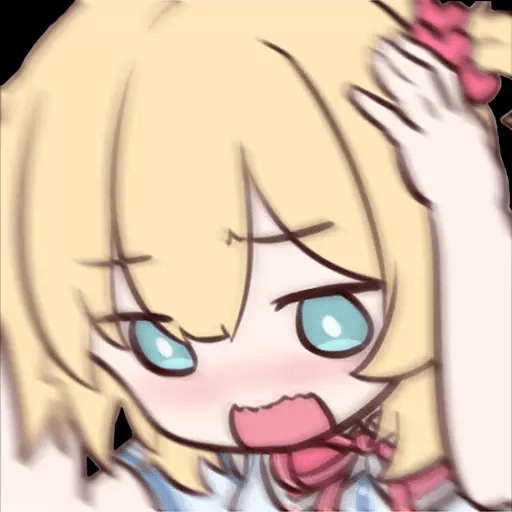

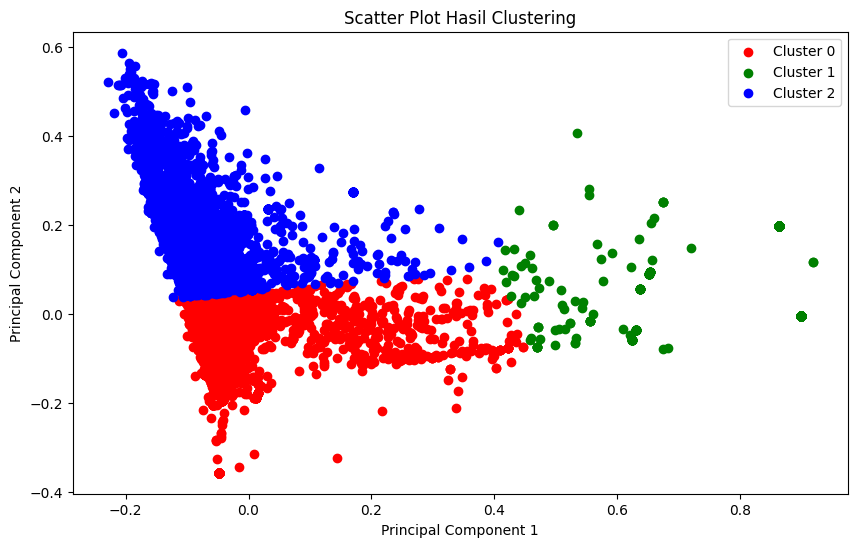

Analisis Cluster Cluster 0:
Jumlah Ulasan: 6217
Contoh Ulasan: being killed over and over again is fun


Analisis Cluster Cluster 1:
Jumlah Ulasan: 487
Contoh Ulasan: good




Analisis Cluster Cluster 2:
Jumlah Ulasan: 3061
Contoh Ulasan: i write this review as i have  completed elden ring and yet despite this i still find new things every time i play the game

elden ring is an experience to say the least and i wont be dramatic and say it is life changing but it feels like this is the video game to play if youre ever going to play a game its immersive and full of story every little thing is made with such refined detail that you can easily miss the little things everything feels so interconnected and it is so easy to get lost and find yourself on an adventure
its been a long time since ive felt like a game really wanted me to just go explore and have fun with the world it feels punishing but no punishment in this game goes unrewarded

heres my breakdown of the game ill try not to spoil

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import re
import matplotlib.pyplot as plt  # Import library untuk visualisasi

url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'
# Baca dataset ulasan game dari file CSV
df = pd.read_csv(url)  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Hapus baris yang memiliki nilai null atau kosong jika ada
df.dropna(subset=['review'], inplace=True)

# Preprocessing tambahan: membersihkan teks dan menghapus kata-kata umum
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['review'] = df['review'].apply(preprocess_text)

# Ekstraksi fitur teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Reduksi dimensi dengan menggunakan PCA
n_components = 2  # Ubah sesuai kebutuhan
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Hitung similarity Gaussian dari data PCA
sigma = 1.0  # Ubah sesuai dengan sigma yang diinginkan
gaussian_similarity = np.exp(-pairwise_distances(pca_result, squared=True) / (2 * (sigma ** 2)))

# Terapkan Spectral Clustering pada similarity matrix
n_clusters = 3  # Gantilah sesuai dengan jumlah cluster yang diinginkan
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
cluster_labels = spectral_cluster.fit_predict(gaussian_similarity)

# Gabungkan label cluster dengan data awal
df['cluster'] = cluster_labels

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']

for cluster_id in range(n_clusters):
    cluster_data = pca_result[df['cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.legend()
plt.title('Scatter Plot Hasil Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analisis setiap cluster
clustered_reviews = {}
for cluster_id in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_id]
    clustered_reviews[f'Cluster {cluster_id}'] = cluster_data['review'].tolist()

for cluster_id, reviews in clustered_reviews.items():
    print(f'Analisis Cluster {cluster_id}:')
    print('Jumlah Ulasan:', len(reviews))
    print('Contoh Ulasan:', reviews[0])  # Cetak contoh ulasan pertama dalam cluster
    print('\n')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IndexError: ignored

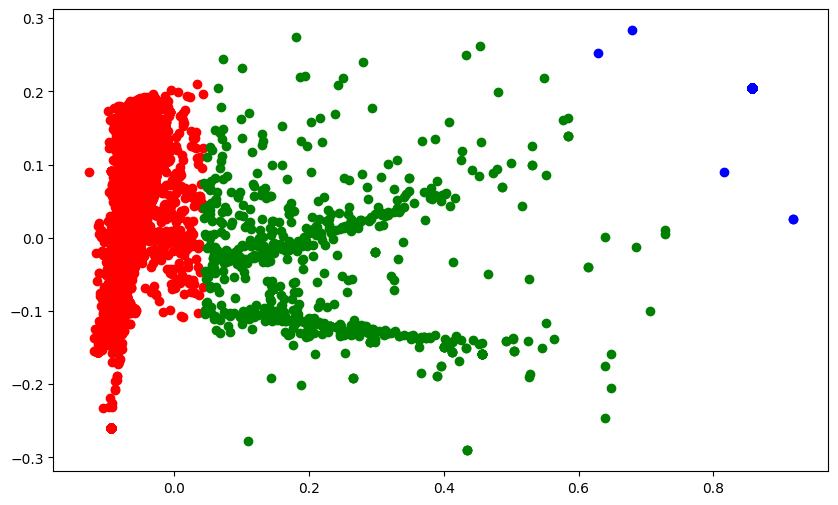

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import re
import matplotlib.pyplot as plt
import nltk  # Import NLTK library
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords jika belum diunduh
nltk.download('stopwords')

url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'
df = pd.read_csv(url)

# Hapus baris yang memiliki nilai null atau kosong jika ada
df.dropna(subset=['review'], inplace=True)

# Preprocessing tambahan: membersihkan teks dan menghapus kata-kata umum
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi teks
    words = nltk.word_tokenize(text)

    # Penghapusan stopword
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming teks
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Menggabungkan kembali kata-kata yang telah diproses
    text = ' '.join(words)

    return text

df['review'] = df['review'].apply(preprocess_text)

# Ekstraksi fitur teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Reduksi dimensi dengan menggunakan PCA
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Hitung similarity Gaussian dari data PCA
sigma = 1.0
gaussian_similarity = np.exp(-pairwise_distances(pca_result, squared=True) / (2 * (sigma ** 2)))

# Terapkan Spectral Clustering pada similarity matrix
n_clusters = 3
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
cluster_labels = spectral_cluster.fit_predict(gaussian_similarity)

# Gabungkan label cluster dengan data awal
df['cluster'] = cluster_labels

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']

for cluster_id in range(n_clusters):
    cluster_data = pca_result[df['cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.legend()
plt.title('Scatter Plot Hasil Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analisis setiap cluster
clustered_reviews = {}
for cluster_id in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_id]
    clustered_reviews[f'Cluster {cluster_id}'] = cluster_data['review'].tolist()

for cluster_id, reviews in clustered_reviews.items():
    print(f'Analisis Cluster {cluster_id}:')
    print('Jumlah Ulasan:', len(reviews))
    print('Contoh Ulasan:', reviews[0])  # Cetak contoh ulasan pertama dalam cluster
    print('\n')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


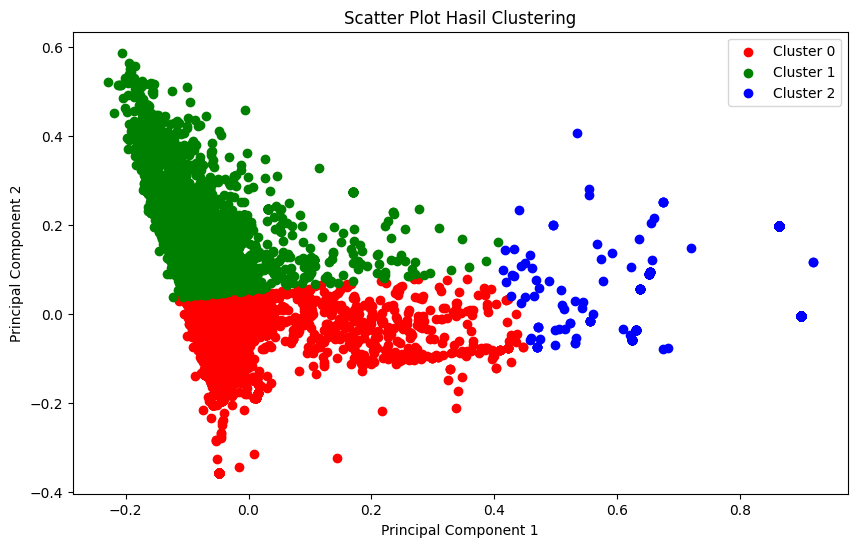

Analisis Cluster Cluster 0:
Jumlah Ulasan: 6217


Analisis Cluster Cluster 1:
Jumlah Ulasan: 3061


Analisis Cluster Cluster 2:
Jumlah Ulasan: 487


Silhouette Score: 0.5037066331383541


In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import silhouette_score

# Download stopwords jika belum diunduh
nltk.download('stopwords')

url = 'https://raw.githubusercontent.com/TriYogaF/dataset/main/elden_ring_steam_reviews.csv'
df = pd.read_csv(url)

# Hapus baris yang memiliki nilai null atau kosong jika ada
df.dropna(subset=['review'], inplace=True)

# Preprocessing tambahan: membersihkan teks dan menghapus kata-kata umum
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['review'] = df['review'].apply(preprocess_text)

# Ekstraksi fitur teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Reduksi dimensi dengan menggunakan PCA
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Hitung similarity Gaussian dari data PCA
sigma = 1.0
gaussian_similarity = np.exp(-pairwise_distances(pca_result, squared=True) / (2 * (sigma ** 2)))

# Terapkan Spectral Clustering pada similarity matrix
n_clusters = 3  # Ubah menjadi 5 kluster
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
cluster_labels = spectral_cluster.fit_predict(gaussian_similarity)

# Gabungkan label cluster dengan data awal
df['cluster'] = cluster_labels

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm']

for cluster_id in range(n_clusters):
    cluster_data = pca_result[df['cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.legend()
plt.title('Scatter Plot Hasil Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analisis setiap cluster
clustered_reviews = {}
for cluster_id in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_id]
    clustered_reviews[f'Cluster {cluster_id}'] = cluster_data['review'].tolist()

for cluster_id, reviews in clustered_reviews.items():
    print(f'Analisis Cluster {cluster_id}:')
    print('Jumlah Ulasan:', len(reviews))
    # print('Contoh Ulasan:', reviews[0])  # Cetak contoh ulasan pertama dalam cluster
    print('\n')

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(gaussian_similarity, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')


3 =
5 = 0.4704393023876183
7 =